<h1 align = 'center'> Jupyter ile Yapay Sinir Ağları  </h1>
<h2 align = 'center'> Kısım 5: Eğitim </h2>

<h4 align = 'center' > Welch Labs </h4>>

In [1]:
%pylab inline
from partFive import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import optimize

In [3]:
class trainer(object):
    def __init__(self, N):
        #Ağ için sınıf içi yerel bir değişken ata
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Callback fonksiyonu için yerel bir değişken ata
        self.X = X
        self.y = y

        #Maliyetleri yerleştirmek için boş bir dizi oluştur
        self.J = []
        
        params0 = self.N.getParams()
        #Parametreleri çağır
        #Eğitim için maksimum döngü sayısını belirle
        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res
    

In [4]:
NN = Neural_Network()

In [5]:
T = trainer(NN)

In [6]:
T.train(X,y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 46
         Function evaluations: 51
         Gradient evaluations: 51


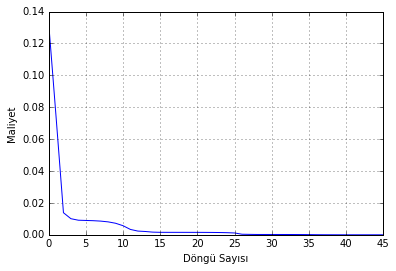

In [7]:
plot(T.J)
grid(1)
xlabel('Döngü Sayısı')
ylabel('Maliyet')

In [8]:
NN.costFunctionPrime(X,y)

(array([[  5.23600891e-07,  -4.67549643e-07,   2.26850797e-07],
        [  3.55283857e-07,  -4.74755973e-07,   2.34641357e-07]]),
 array([[ -2.93534104e-07],
        [ -8.17803266e-07],
        [ -5.84047565e-07]]))

In [9]:
NN.forward(X)

array([[ 0.74999865],
       [ 0.81999045],
       [ 0.93000844]])

In [10]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [11]:
#Uyku/Çalışma test kombinasyonları
hoursSleep = linspace(0, 10, 100)
hoursStudy = linspace(0, 5, 100)

#Eğitim verisinde olduğu gibi test verilerini de normalize et
hoursSleepNorm = hoursSleep/10.
hoursStudyNorm = hoursStudy/5.

#Sonucu meshgrid'e ata
a, b  = meshgrid(hoursSleepNorm, hoursStudyNorm)

#Sonucu ravel ile tek bir giriş matrisine ata
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()

In [12]:
allOutputs = NN.forward(allInputs)

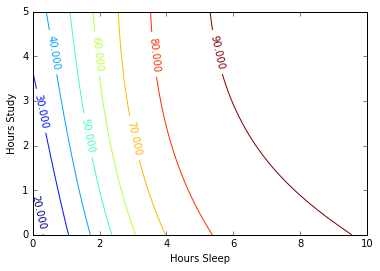

In [14]:
#Kontur Çizdir
yy = np.dot(hoursStudy.reshape(100,1), np.ones((1,100)))
xx = np.dot(hoursSleep.reshape(100,1), np.ones((1,100))).T

CS = contour(xx,yy,100*allOutputs.reshape(100, 100))
clabel(CS, inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')

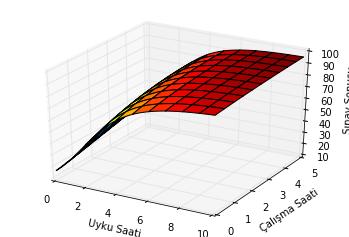

In [15]:
#3D plot:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), \
                       cmap=cm.jet)

ax.set_xlabel('Uyku Saati')
ax.set_ylabel('Çalışma Saati')
ax.set_zlabel('Sınav Sonucu')